### Todas las librerias

In [4]:
import datetime
import numpy as np
import pandas as pd
from datetime import date, timedelta, datetime
import os
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import (adjusted_mutual_info_score, homogeneity_score,
                            completeness_score,classification_report, confusion_matrix,
                            mean_squared_error, mean_absolute_error,
                            mean_absolute_percentage_error,
                            silhouette_score, v_measure_score, adjusted_rand_score)
from sklearn.linear_model import ElasticNet, SGDClassifier, LogisticRegression
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import plotly.graph_objects as go
import plotly.express as px
import statsmodels.api as sm

from imblearn.over_sampling import RandomOverSampler

Ejercicio 1 (2 puntos):
a) Crea una función que calcule y devuelva el factorial de un número entero. (0.6 puntos)



In [5]:
def factorial(n):
   if n==0 or n==1:
            resultado=1
   elif n>1:
            resultado=n*factorial(n-1)
   return resultado
print(factorial(4))

24


b) Crea una función que verifique si un número es primo o no. (0.6 puntos)

In [36]:
def es_primo(num):
    for n in range(2, num):
        if num % n == 0:
            return 0
    return 1

print(es_primo(4))

0


c) Muestra en un dataframe los 50 primeros números positivos, si es primo y su factorial utilizando las funciones anteriores. (0.6 puntos)

In [43]:
df=pd.DataFrame(columns=["numbers","primo","factorial"])
df["numbers"]=range(50)
df["primo"]=df["numbers"].apply(es_primo) 
df["factorial"]=df["numbers"].apply(factorial) 
print(df)


    numbers  primo                                          factorial
0         0      1                                                  1
1         1      1                                                  1
2         2      1                                                  2
3         3      1                                                  6
4         4      0                                                 24
5         5      1                                                120
6         6      0                                                720
7         7      1                                               5040
8         8      0                                              40320
9         9      0                                             362880
10       10      0                                            3628800
11       11      1                                           39916800
12       12      0                                          479001600
13       13      1  

d) ¿Cómo se podría programar en una clase las tres operaciones anteriores? (0.2 puntos)

In [49]:
class framePrimoFact():
    def __init__(self,n):
        self.df=pd.DataFrame(columns=["numbers","primo","factorial"])
        self.df["numbers"]=range(n)
        self.df["primo"]=self.df["numbers"].apply(es_primo) 
        self.df["factorial"]=self.df["numbers"].apply(factorial)


    def es_primo(x):
        for n in range(2, x):
            if x % n == 0:
                return 0
        return 1

    def factorial(n):
        if n==0 or n==1:
                resultado=1
        elif n>1:
                resultado=n*factorial(n-1)
        return resultado
    
    def dataframe(self):
         return self.df

framePrimoFact(5).dataframe()

        

,numbers,primo,factorial
0,0,1,1
1,1,1,1
2,2,1,2
3,3,1,6
4,4,0,24


Ejercicio 2 (4 puntos):
a) Extrae de sklearn el conjunto de datos California Housing dataset y transfórmalo a dataframe de pandas (0.25 puntos)

b) Construye una función que muestra la estructura del dataset, el número de NAs, tipos de variables y estadísticas básicas de cada una de las variables. (0.5 puntos)

c) Construye una Regresión lineal y un Random forest que predigan el Median house value según los datos disponibles. (0.75 puntos)

d) Visualiza cuales son las variables (coeficientes) más importantes en cada uno de los modelos. (1.25 puntos)

e) Decide a través de las métricas que consideres oportunas, cuál de los dos modelos es mejor, por qué y explica el proceso que has realizado para responder en los puntos anteriores. (1.25 puntos)

In [6]:
# Carga del fichero de datos de clasificación
from sklearn.datasets import fetch_california_housing
dataset = sklearn.datasets.fetch_california_housing()
# Pasamos a formato dataframe
df = pd.DataFrame(data = dataset['data'], columns = dataset['feature_names'])
# Agregamos la variable objetivo
df["target"] = dataset["target"]
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64
Empty DataFrame
Columns: [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, target]
Index: []


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


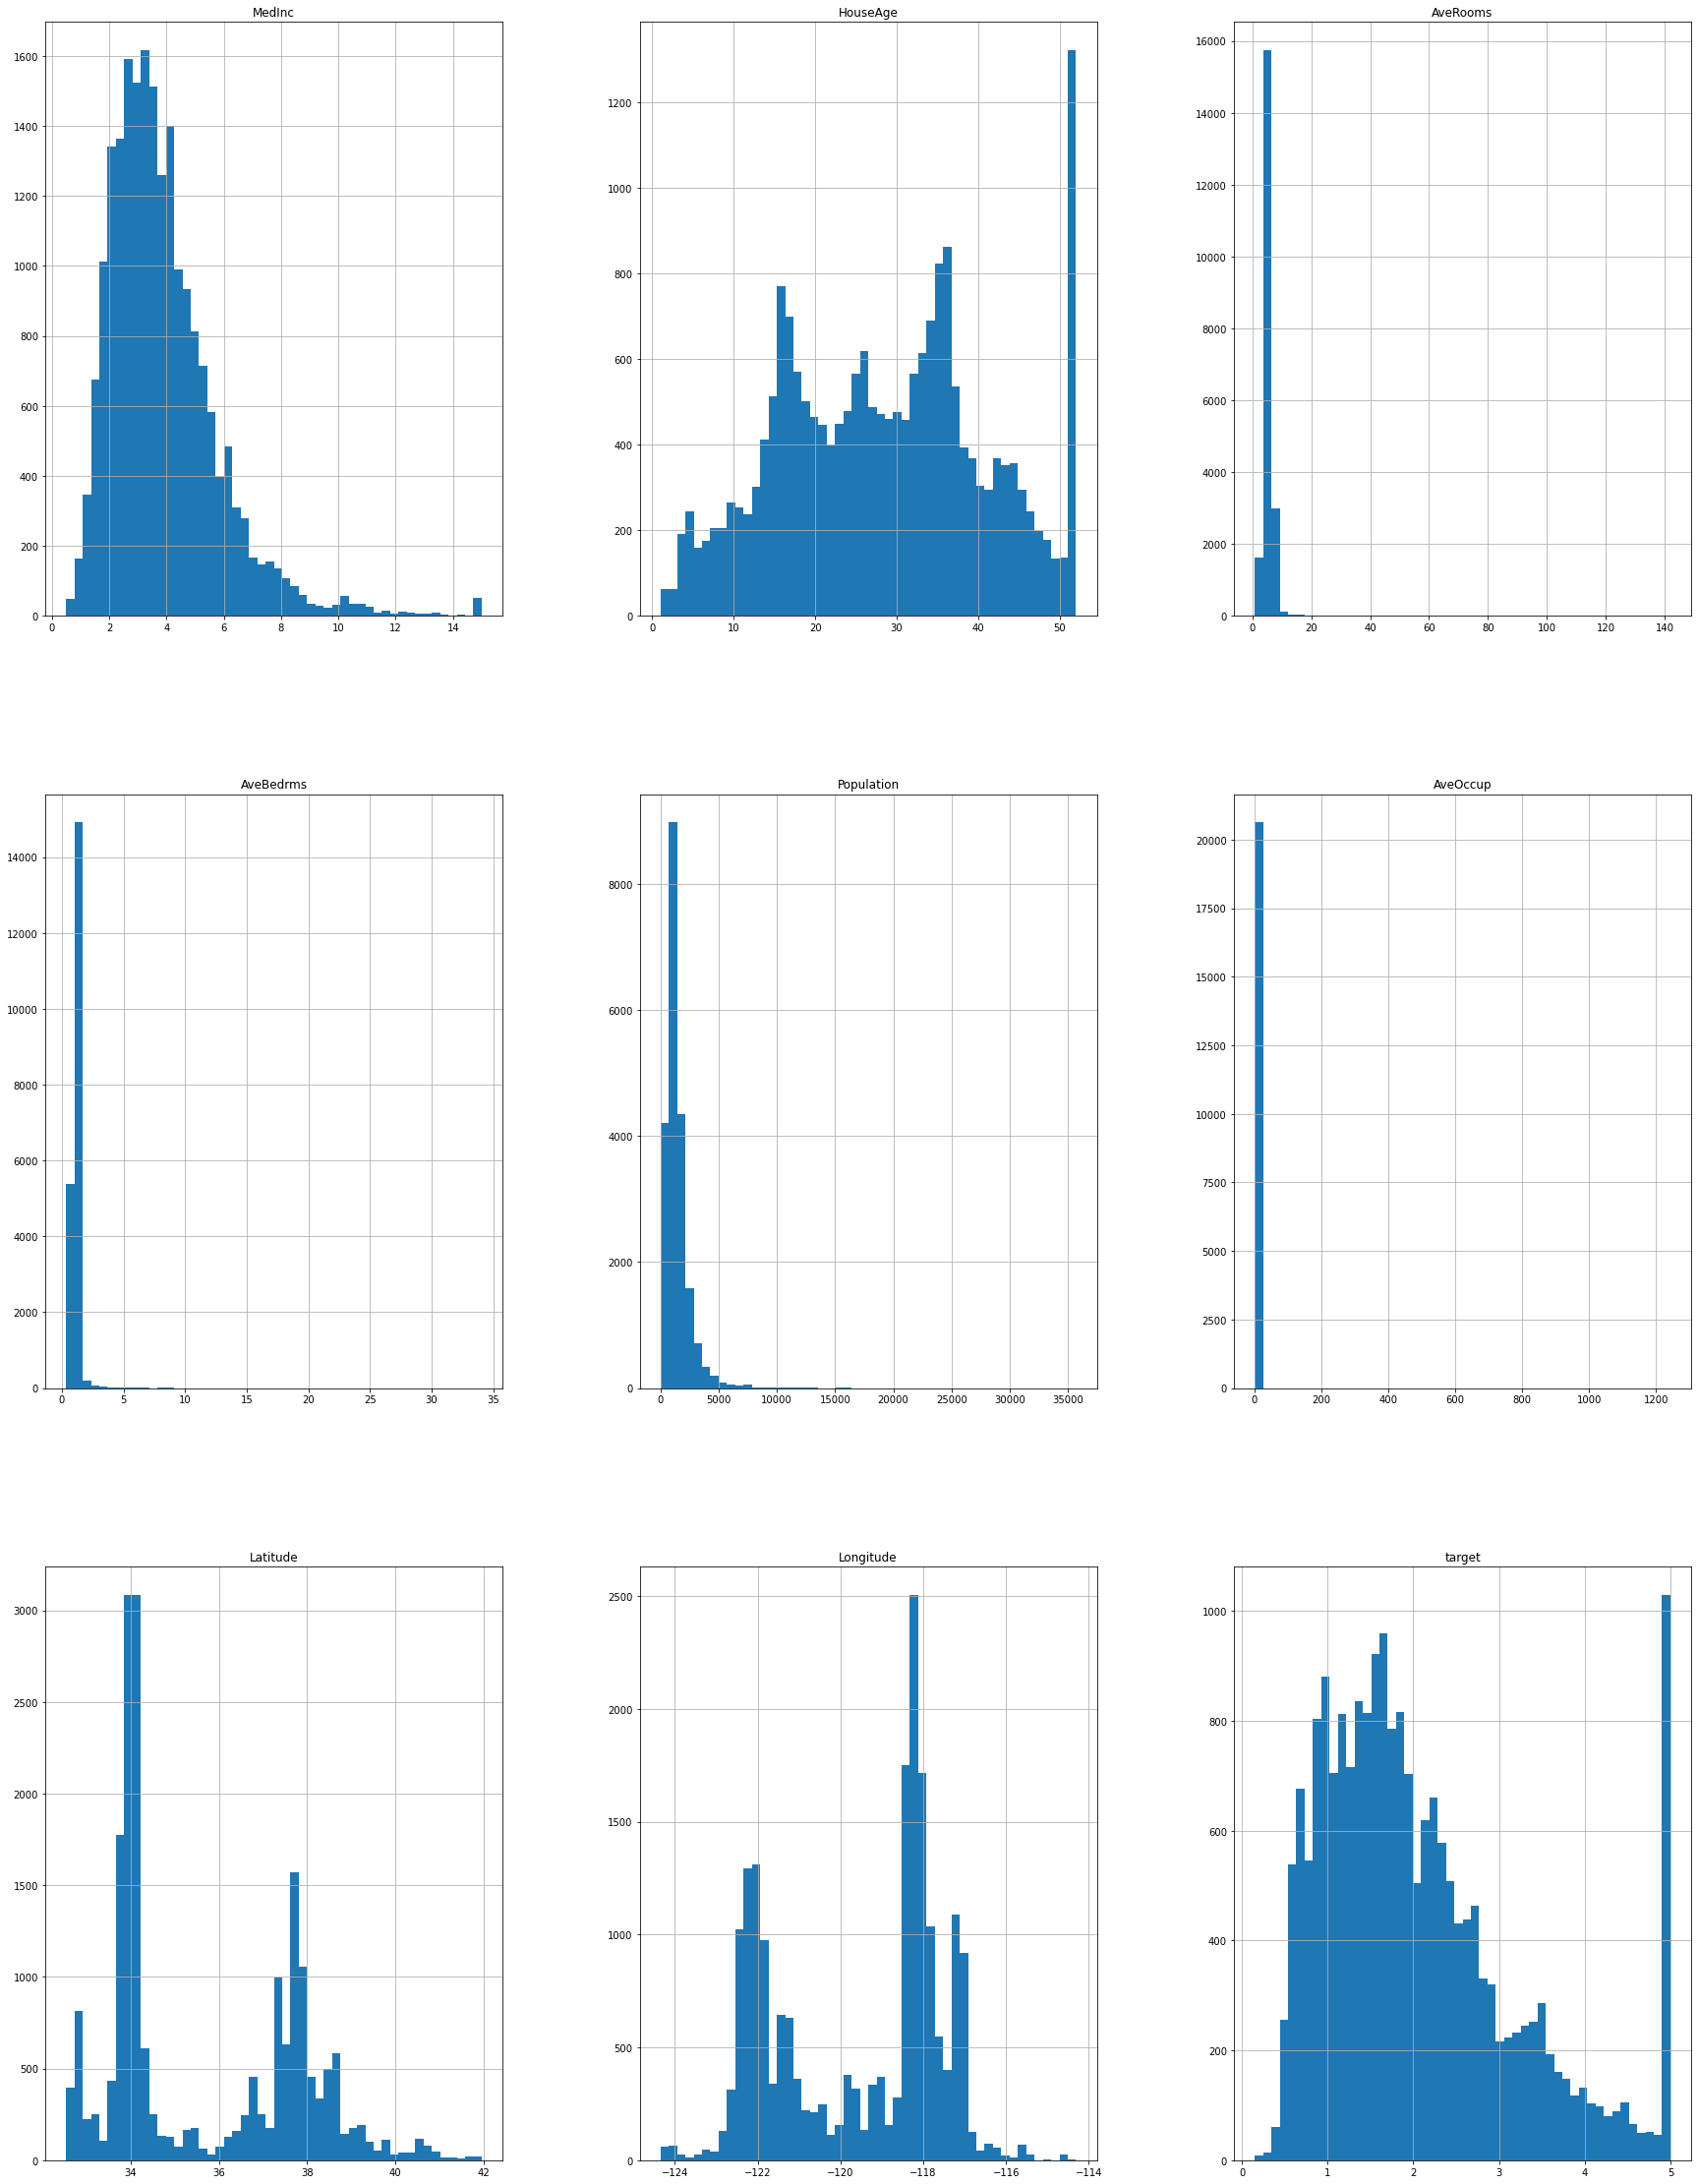

In [7]:
print(df.isna().sum())
print(df[df.isna().any(axis=1)]) # Observar las filas que contienen las NA's antes de borrarlas. 
df.dropna(inplace=True)

df.hist(bins=50, figsize=(30,40))
df.corr()

In [62]:
# Dividir train-test
X = dataset["data"].copy()
y = dataset["target"].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.3, random_state = 123)
reg = ElasticNet()
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)
predictions_train = reg.predict(X_train)
# Metricas de evaluación
rmse_train = np.sqrt(mean_squared_error(y_train,predictions_train))
mae_train = mean_absolute_error(y_train, predictions_train)
mape_train = mean_absolute_percentage_error(y_train, predictions_train)

rmse_test = np.sqrt(mean_squared_error(y_test,predictions))
mae_test = mean_absolute_error(y_test, predictions)
mape_test = mean_absolute_percentage_error(y_test, predictions)

print("El RMSE de train del modelo es: {}".format(rmse_train))
print(f"El MAE de train del modelo es: {mae_train}")
print(f"El MAPE de train del modelo es: {100 * mape_train} %")

print("")

print("El RMSE de test del modelo es: {}".format(rmse_test))
print(f"El MAE de test del modelo es: {mae_test}")
print(f"El MAPE de test del modelo es: {100*mape_test} %")

El RMSE de train del modelo es: 0.877980259023968
El MAE de train del modelo es: 0.6807095985024406
El MAPE de train del modelo es: 45.20172523874712 %

El RMSE de test del modelo es: 0.8720194772729226
El MAE de test del modelo es: 0.6785162737312243
El MAPE de test del modelo es: 46.262056633536005 %


In [74]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=50,max_depth=5)
clf.fit(X, y)
predictions=clf.predict(X_test)
predictions_train = clf.predict(X_train)
# Metricas de evaluación
rmse_train = np.sqrt(mean_squared_error(y_train,predictions_train))
mae_train = mean_absolute_error(y_train, predictions_train)
mape_train = mean_absolute_percentage_error(y_train, predictions_train)

rmse_test = np.sqrt(mean_squared_error(y_test,predictions))
mae_test = mean_absolute_error(y_test, predictions)
mape_test = mean_absolute_percentage_error(y_test, predictions)

print("El RMSE de train del modelo es: {}".format(rmse_train))
print(f"El MAE de train del modelo es: {mae_train}")
print(f"El MAPE de train del modelo es: {100 * mape_train} %")

print("")

print("El RMSE de test del modelo es: {}".format(rmse_test))
print(f"El MAE de test del modelo es: {mae_test}")
print(f"El MAPE de test del modelo es: {100*mape_test} %")

El RMSE de train del modelo es: 0.6601541694772718
El MAE de train del modelo es: 0.48105936327330867
El MAPE de train del modelo es: 29.774174449419156 %

El RMSE de test del modelo es: 0.6556572809260707
El MAE de test del modelo es: 0.48032090656151283
El MAPE de test del modelo es: 30.282448271518792 %


In [75]:
print(reg.coef_)

[ 2.53912734e-01  1.09735267e-02  0.00000000e+00 -0.00000000e+00
  1.11830749e-05 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]


In [76]:
print(clf.feature_importances_)

[0.75478532 0.0408163  0.01854407 0.00081961 0.00379145 0.14200313
 0.0251567  0.01408342]


Elegiría la Regresión lineal porque aunque el RMSE es algo mayor, es más sencilla y utiliza menos coeficientes por lo que es más robusto el modelo.

Para las respuestas b, c, d, e, f y g es imperativo acompañarlas respuestas con una visualización.

a) Lee el fichero en formato dataframe, aplica la función del ejercicio 2.b, elimina NAs y convierte a integer si fuera necesario. (0.25 puntos)

b) ¿Cuántos artistas únicos hay? (0.25 puntos)

c) ¿Cuál es la distribución de reproducciones? (0.5 puntos)

d) ¿Existe una diferencia signitificativa en las reproducciones entre las canciones de un solo artista y las de más de uno? (0.5 puntos)

e) ¿Cuáles son las propiedades de una canción que mejor correlan con el número de reproducciones de una canción? (0.5 puntos)

f) ¿Cuáles son las variables que mejor predicen las canciones que están por encima el percentil 50? (1 puntos)

Nota: Crea una variable binaria (Hit/No Hit) en base a 3.c, crea una regresión logística y visualiza sus coeficientes.

g) Agrupa los 4 gráficos realizados en uno solo y haz una recomendación a un sello discográfico para producir un nuevo hit. (1 puntos)

In [163]:
df = pd.read_csv("spotify.csv", encoding = "ISO-8859-1")
print(df.isna().sum())
print(df[df.isna().any(axis=1)]) # Observar las filas que contienen las NA's antes de borrarlas. 
df.dropna(inplace=True)
df.head()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64
                                            track_name  \
12                                             Flowers   
14                                           As It Was   
17   What Was I Made For? [From The Motion Picture ...   
22                                    I Wanna Be Yours   
35                                     Los del Es

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [164]:
df[['streams']] = df[['streams']].apply(pd.to_numeric, errors='coerce')
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,8.160000e+02,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000
mean,1.567931,2018.457772,6.018360,13.696450,4849.898409,11.722154,4.689858e+08,60.161567,49.473684,2.451652,122.565483,67.391677,51.201958,64.362301,26.309670,1.676867,18.168911,10.526316
std,0.876211,10.829267,3.572554,9.299663,7741.126455,18.617668,5.231267e+08,74.923594,49.570455,5.397024,28.174803,14.688458,23.620978,16.107587,25.470972,8.767328,13.541996,10.219987
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2021.000000,3.000000,5.000000,829.000000,0.000000,1.342848e+08,12.000000,6.000000,0.000000,99.000000,57.000000,32.000000,53.000000,5.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,5.000000,13.000000,2040.000000,3.000000,2.638368e+08,32.000000,34.000000,0.000000,120.000000,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,4890.000000,16.000000,6.011986e+08,78.000000,84.000000,2.000000,141.000000,79.000000,70.000000,76.000000,41.000000,0.000000,24.000000,12.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.562544e+09,532.000000,275.000000,45.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [165]:
len(df["artist(s)_name"].unique())

571

In [166]:
import plotly.express as px
fig = px.histogram(df, x="artist(s)_name", y="streams")
fig.show()

La proporcion total de reproducciones partido de numero de artistas totales, es mejor para solos

In [167]:

df_solo=df[df["artist_count"]==1]
df_varios=df[df["artist_count"]!=1]


print((df_solo["streams"].sum()/len(df_solo["artist(s)_name"])))

print((df_varios["streams"].sum()/len(df_varios["artist(s)_name"])))

505369297.91093117
411888391.91640866


Correla con las playlist de spotify y apple con lo que mejor

In [182]:
df_corr=df.corr()
df_corr["streams"]


,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Hits
count,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,8.160000e+02,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000
mean,1.567931,2018.457772,6.018360,13.696450,4849.898409,11.722154,4.689858e+08,60.161567,49.473684,2.451652,122.565483,67.391677,51.201958,64.362301,26.309670,1.676867,18.168911,10.526316,0.499388
std,0.876211,10.829267,3.572554,9.299663,7741.126455,18.617668,5.231267e+08,74.923594,49.570455,5.397024,28.174803,14.688458,23.620978,16.107587,25.470972,8.767328,13.541996,10.219987,0.500306
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000,0.000000
25%,1.000000,2021.000000,3.000000,5.000000,829.000000,0.000000,1.342848e+08,12.000000,6.000000,0.000000,99.000000,57.000000,32.000000,53.000000,5.000000,0.000000,10.000000,4.000000,0.000000
50%,1.000000,2022.000000,5.000000,13.000000,2040.000000,3.000000,2.638368e+08,32.000000,34.000000,0.000000,120.000000,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000,0.000000
75%,2.000000,2022.000000,9.000000,22.000000,4890.000000,16.000000,6.011986e+08,78.000000,84.000000,2.000000,141.000000,79.000000,70.000000,76.000000,41.000000,0.000000,24.000000,12.000000,1.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.562544e+09,532.000000,275.000000,45.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000,1.000000


In [200]:
df["Hits"]=(df['streams'].gt(df['streams'].median())).astype(int)
# Dividir juego de datos en entrenamiento y test
# Realizar siempre antes de crear un modelo.

dfX = df.loc[:, df.columns !="Hits"].select_dtypes([np.number])
X = dfX.replace('NaN',0)
y = df["Hits"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)
# Inicializar modelos
# Crear un objeto de sobremuestreo
ros = RandomOverSampler(random_state=0)

# Aplicar el sobremuestreo a tus datos
X_resampled, y_resampled = ros.fit_resample(X, y)

# X_resampled y y_resampled son tus datos rebalanceados

# Regresión logística
clf_log = LogisticRegression(max_iter=10000, tol=0.1)
clf_log.fit(X_train, y_train)



ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
predictions = clf_log.predict(X_test)

print("Classification report")
print(classification_report(y_test, predictions, target_names=dataset["target_names"]))

print("Confusion matrix")
print(confusion_matrix(y_test, predictions))

predictions = clf_sgd.predict(X_test)

print("Classification report")
print(classification_report(y_test, predictions, target_names=dataset["target_names"]))

print("Confusion matrix")
print(confusion_matrix(y_test, predictions))